In [2]:
import numpy as np
import pandas as pd
import re
from datetime import datetime
import sys
path_file = ('D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Plataforma\\')
sys.path.append(path_file)
from datamanager_updated import DataManager
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
from PyPDF2 import PdfFileMerger

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [3]:
df_metro = pd.read_csv("D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Lab_Metrologia\\Datos_ref.csv", encoding='latin1')

In [7]:
df_metro.head()

,Temperatura (°C),Humedad (%RH)
Fecha,,
2023-07-31 08:07:52,20.7,62.6
2023-07-31 08:17:52,20.9,66.9
2023-07-31 08:27:52,21.0,63.9
2023-07-31 08:37:52,21.1,62.3
2023-07-31 08:47:52,21.2,61.8


In [5]:
df_metro["Fecha"] = df_metro["Fecha"].apply(lambda x: datetime.strptime(x.strip(), "%m/%d/%y %H:%M:%S").strftime("%Y-%m-%d %H:%M:%S"))

# Convert formatted string back to datetime format
df_metro["Fecha"] = pd.to_datetime(df_metro["Fecha"], format="%Y-%m-%d %H:%M:%S")

In [6]:
df_metro.set_index("Fecha", drop=True, inplace=True)

In [8]:
for i in ["Temperatura (°C)", "Humedad (%RH)"]:
    print(i)
    print("avg", round(np.mean(df_metro[i]),2))
    print("min", np.min(df_metro[i]))
    print("max", np.max(df_metro[i]))

Temperatura (°C)
avg 20.63
min 19.5
max 24.3
Humedad (%RH)
avg 60.39
min 50.4
max 66.9


In [9]:
df_u1 = pd.read_csv("D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Lab_Metrologia\\Datos_u1.csv")#, encoding='latin1')

In [13]:
df_u1.head()

,Temp 1,Temp2,Humedad
0,26.75,25.60,60.70
1,27.11,25.77,60.82
2,27.48,25.92,60.87
3,27.82,26.20,60.81
4,28.13,26.36,60.73


In [33]:
for i in ["Temp2", "Humedad"]:
    print(i)
    print("avg", round(np.mean(df_u1[i][0:12500]),2))
    print("min", np.min(df_u1[i][0:12500]))
    print("max", np.max(df_u1[i][0:12500]))
print("size", len(df_u1.index))

Temp2
avg 30.54
min 22.75
max 51.53
Humedad
avg 56.45
min 32.09
max 69.32
size 16503


In [14]:
df_u2 = pd.read_csv("D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Lab_Metrologia\\Datos_u2.csv")#, encoding='latin1')

In [15]:
df_u2.head()

,Temp1,Temp2,Humedad
0,29.58,28.14,60.39
1,30.58,28.31,60.62
2,26.39,24.37,54.69
3,26.93,24.53,55.28
4,27.40,24.69,53.25


In [34]:
for i in ["Temp2", "Humedad"]:
    print(i)
    print("avg", round(np.mean(df_u22[i]),2))
    print("min", np.min(df_u22[i]))
    print("max", np.max(df_u22[i]))
print("size", len(df_u22.index))

Temp2
avg 24.32
min 15.43
max 34.5
Humedad
avg 58.09
min 38.07
max 78.22
size 14000


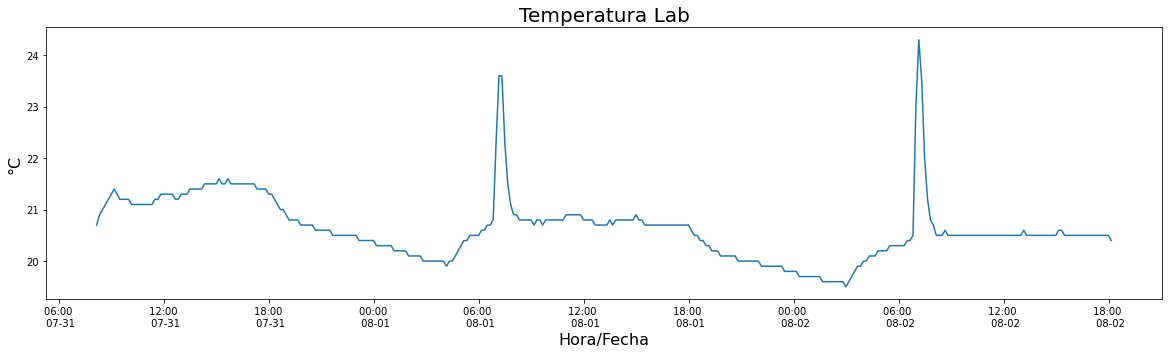

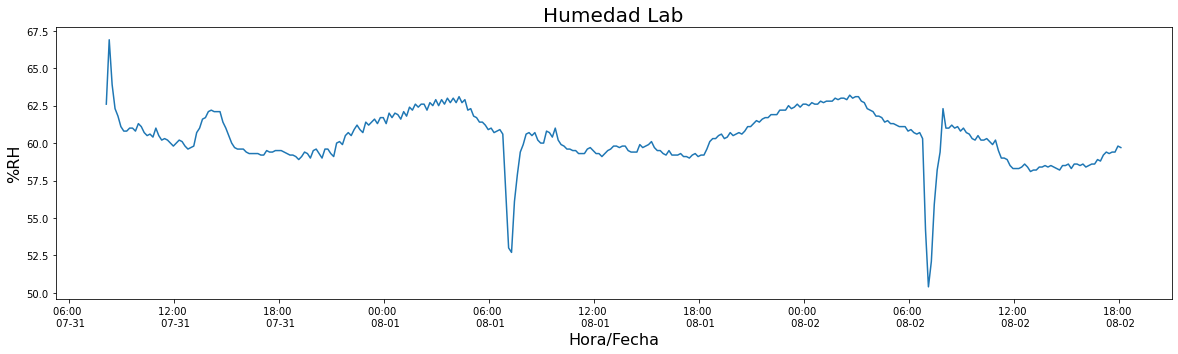

In [30]:
fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_metro.index, df_metro["Temperatura (°C)"])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel("°C", fontsize=16, color='k')
ax.set_xlabel("Hora/Fecha", fontsize=16, color='k')
ax.set_title("Temperatura Lab", fontsize=20, color='k')
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_metro.index, df_metro["Humedad (%RH)"])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel("%RH", fontsize=16, color='k')
ax.set_xlabel("Hora/Fecha", fontsize=16, color='k')
ax.set_title("Humedad Lab", fontsize=20, color='k')
plt.show()

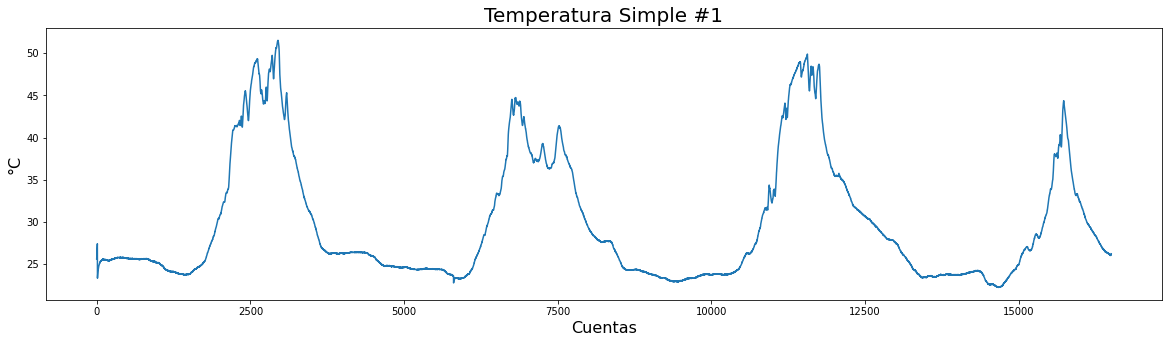

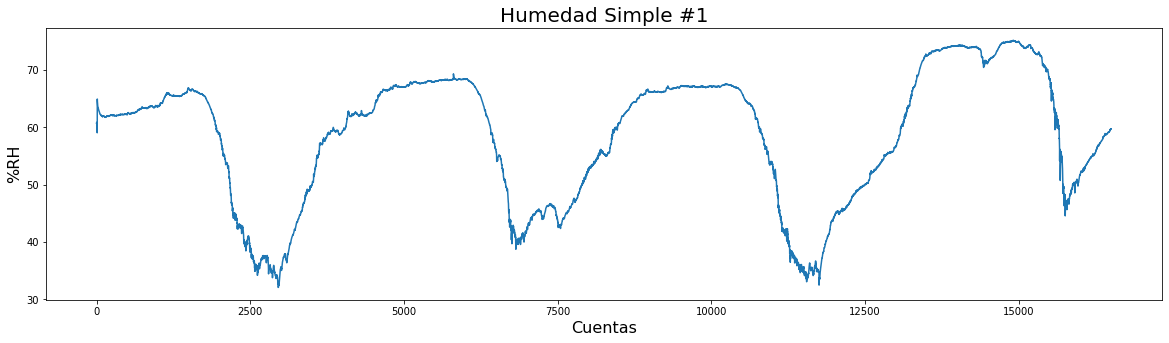

In [18]:
fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_u1.index, df_u1["Temp2"])
ax.set_ylabel("°C", fontsize=16, color='k')
ax.set_xlabel("Cuentas", fontsize=16, color='k')
ax.set_title("Temperatura Simple #1", fontsize=20, color='k')
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_u1.index, df_u1["Humedad"])
ax.set_ylabel("%RH", fontsize=16, color='k')
ax.set_xlabel("Cuentas", fontsize=16, color='k')
ax.set_title("Humedad Simple #1", fontsize=20, color='k')
plt.show()

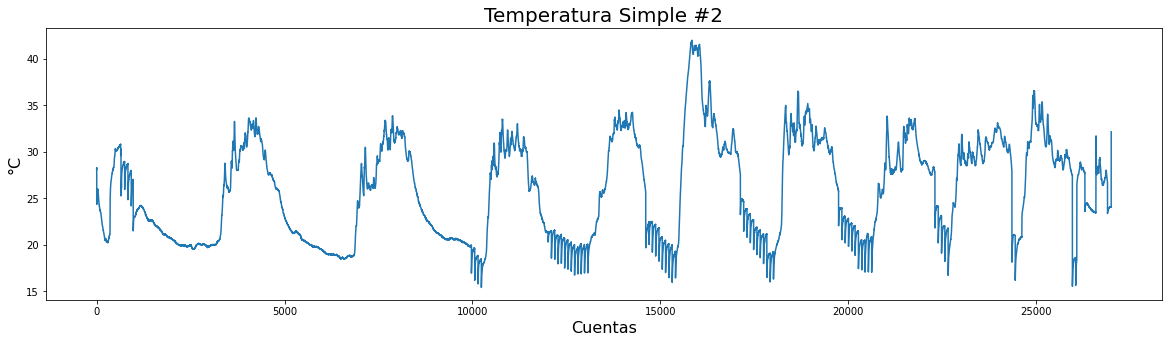

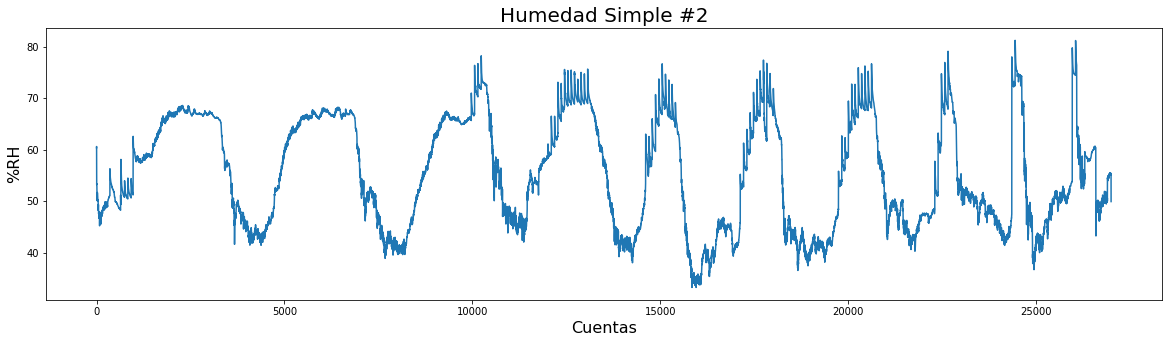

In [27]:
fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_u2.index, df_u2["Temp2"])
ax.set_ylabel("°C", fontsize=16, color='k')
ax.set_xlabel("Cuentas", fontsize=16, color='k')
ax.set_title("Temperatura Simple #2", fontsize=20, color='k')
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_u2.index, df_u2["Humedad"])
ax.set_ylabel("%RH", fontsize=16, color='k')
ax.set_xlabel("Cuentas", fontsize=16, color='k')
ax.set_title("Humedad Simple #2", fontsize=20, color='k')
plt.show()

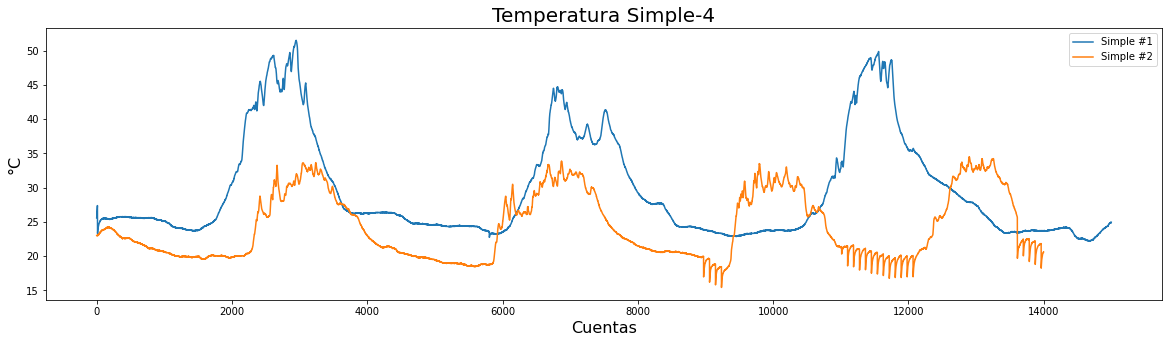

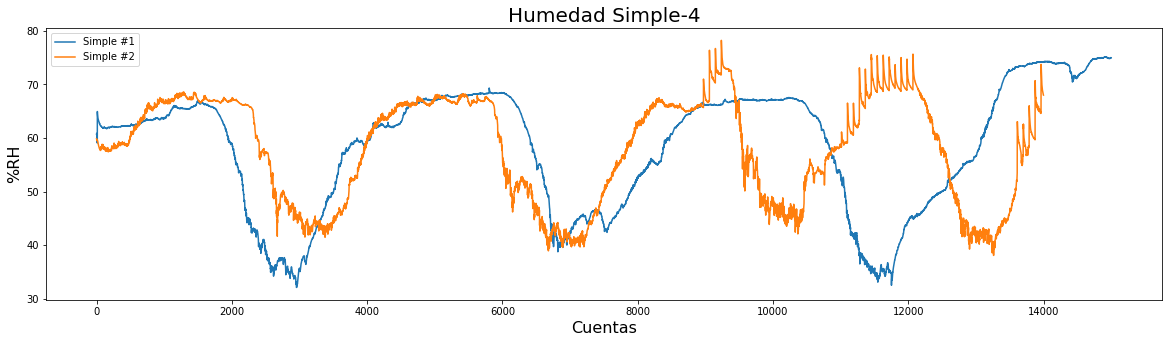

In [31]:
fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
# ax.plot(df_metro2.index, df_metro2["Temperatura (°C)"], label="Lab")
ax.plot(df_u1.index[0:15000], df_u1["Temp2"][0:15000], label="Simple #1")
ax.plot(df_u22.index[0:15000], df_u22["Temp2"][0:15000], label="Simple #2")
ax.set_ylabel("°C", fontsize=16, color='k')
ax.set_xlabel("Cuentas", fontsize=16, color='k')
ax.set_title("Temperatura Simple-4", fontsize=20, color='k')
plt.legend()
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
# ax.plot(df_metro2.index, df_metro2["Humedad (%RH)"], label="Lab")
ax.plot(df_u1.index[0:15000], df_u1["Humedad"][0:15000], label="Simple #1")
ax.plot(df_u22.index[0:15000], df_u22["Humedad"][0:15000], label="Simple #2")
ax.set_ylabel("%RH", fontsize=16, color='k')
ax.set_xlabel("Cuentas", fontsize=16, color='k')
ax.set_title("Humedad Simple-4", fontsize=20, color='k')
plt.legend()
plt.show()

In [23]:
df_u22 = df_u2[1000:15000]

In [25]:
df_u22.reset_index(drop=True, inplace=True)

In [51]:
df_metro2 = pd.concat([df_metro] * (len(df_u1) // len(df_metro)) +[df_metro.iloc[:len(df_u1) % len(df_metro)]])

In [57]:
df_metro2.reset_index(drop=True, inplace=True)

In [54]:
df_metro2

,Temperatura (°C),Humedad (%RH),Fecha
0,20.7,62.6,07/31/23 08:07:52
1,20.9,66.9,07/31/23 08:17:52
2,21.0,63.9,07/31/23 08:27:52
3,21.1,62.3,07/31/23 08:37:52
4,21.2,61.8,07/31/23 08:47:52
5,21.3,61.1,07/31/23 08:57:52
6,21.4,60.8,07/31/23 09:07:52
7,21.3,60.8,07/31/23 09:17:52
8,21.2,61.0,07/31/23 09:27:52
9,21.2,61.0,07/31/23 09:37:52
